# Predicting political party choice of US county by county demographic and socio-economic data

### by Adi Maini

Data Source: 
    from Kaggle: 
    https://www.kaggle.com/benhamner/2016-us-election#county_facts.csv

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [238]:
#  importing US county facts data
county_df = pd.read_csv('./Data/2016-us-election/county_facts.csv')


#. renaming some columns for EDA
county_df.rename(mapper={'PST045214': 'Population', 
                  'AGE295214': 'P_under_18',
                  'AGE775214': 'P_over_65',
                  'SEX255214': 'F_percent',
                  'RHI125214': 'White_percent',
                  'RHI225214': 'Black_percent', 
                  'RHI325214': 'Native_percent', 
                  'RHI425214': 'Asian_percent',
                  'RHI725214': 'Hispanic_percent', 
                  'POP815213': 'Other_languages', 
                  'VET605213': 'Veterans', 
                  'INC110213': 'Median_house_income', 
                  'PVY020213': 'below_poverty',
                  'POP060210': 'Pop_per_sq'}, axis=1, inplace=True)
#  drop state appreviation column since state name column is available
county_df = county_df.dropna(axis=0, subset=['state_abbreviation'])

In [186]:
# import election data
primary_df = pd.read_csv('./Data/2016-us-election/primary_results.csv', )

# keep only the data point from candidate with most votes from each fips
primary_df = primary_df.loc[primary_df.groupby(by='fips')['votes'].idxmax()]

In [187]:
# merging both data frames
election_county_facts_df = pd.merge(primary_df, county_df, how='left', on='fips')
del election_county_facts_df['state_abbreviation_x']
del election_county_facts_df['state_abbreviation_y']

In [188]:
election_county_facts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4207 entries, 0 to 4206
Data columns (total 59 columns):
state                  4207 non-null object
county                 4207 non-null object
fips                   4207 non-null float64
party                  4207 non-null object
candidate              4207 non-null object
votes                  4207 non-null int64
fraction_votes         4207 non-null float64
area_name              2798 non-null object
Population             2798 non-null float64
PST040210              2798 non-null float64
PST120214              2798 non-null float64
POP010210              2798 non-null float64
AGE135214              2798 non-null float64
P_under_18             2798 non-null float64
P_over_65              2798 non-null float64
F_percent              2798 non-null float64
White_percent          2798 non-null float64
Black_percent          2798 non-null float64
Native_percent         2798 non-null float64
Asian_percent          2798 non-null float64


## Lot of counties are missing demographic data. For the purposes of this project, we will drop any counties with missing data/

In [189]:
election_county_facts_df = election_county_facts_df.dropna(axis=0)

In [190]:
election_county_facts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2798 entries, 0 to 2797
Data columns (total 59 columns):
state                  2798 non-null object
county                 2798 non-null object
fips                   2798 non-null float64
party                  2798 non-null object
candidate              2798 non-null object
votes                  2798 non-null int64
fraction_votes         2798 non-null float64
area_name              2798 non-null object
Population             2798 non-null float64
PST040210              2798 non-null float64
PST120214              2798 non-null float64
POP010210              2798 non-null float64
AGE135214              2798 non-null float64
P_under_18             2798 non-null float64
P_over_65              2798 non-null float64
F_percent              2798 non-null float64
White_percent          2798 non-null float64
Black_percent          2798 non-null float64
Native_percent         2798 non-null float64
Asian_percent          2798 non-null float64


In [227]:
election_county_facts_df['Veteran_percent'] = election_county_facts_df['Veterans']/election_county_facts_df['Population']
del election_county_facts_df['Veterans']

In [192]:
# primary results for 10 highest veteran population counties
election_county_facts_df.sort_values(by='below_poverty', ascending=False).head(10)

,state,county,fips,party,candidate,votes,fraction_votes,area_name,Population,PST040210,...,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,Pop_per_sq,Veteran_percent
2087,South Dakota,Oglala Lakota,46113.0,Democrat,Bernie Sanders,574,0.575,Shannon County,14218.0,13586.0,...,0.0,0.0,0.0,39229.0,2883.0,18096.0,0.0,2093.90,6.5,0.047756
985,Louisiana,East Carroll,22035.0,Democrat,Hillary Clinton,508,0.880,East Carroll Parish,7487.0,7759.0,...,0.0,0.0,0.0,34009.0,4117.0,2074.0,0.0,420.70,18.4,0.033525
1165,Mississippi,Humphreys,28053.0,Democrat,Hillary Clinton,2894,0.942,Humphreys County,8741.0,9375.0,...,27.6,0.0,15127.0,81350.0,8198.0,4395.0,0.0,418.49,22.4,0.057087
2091,South Dakota,Todd,46121.0,Democrat,Bernie Sanders,524,0.562,Todd County,9882.0,9612.0,...,25.7,0.0,0.0,39515.0,3911.0,1719.0,0.0,1388.56,6.9,0.050293
378,Georgia,Clay,13061.0,Democrat,Hillary Clinton,297,0.858,Clay County,3102.0,3183.0,...,42.5,0.0,1533.0,11021.0,3465.0,0.0,5.0,195.38,16.3,0.075435
2046,South Dakota,Corson,46031.0,Democrat,Bernie Sanders,148,0.563,Corson County,4182.0,4050.0,...,0.0,0.0,0.0,10591.0,2536.0,94.0,0.0,2469.69,1.6,0.075562
2307,Texas,Hudspeth,48229.0,Democrat,Hillary Clinton,147,0.538,Hudspeth County,3211.0,3476.0,...,0.0,0.0,0.0,12480.0,3898.0,1994.0,0.0,4570.98,0.8,0.057303
1164,Mississippi,Holmes,28051.0,Democrat,Hillary Clinton,3301,0.929,Holmes County,18459.0,19478.0,...,25.9,207973.0,31091.0,114372.0,5599.0,5530.0,7.0,756.70,25.4,0.031096
2097,South Dakota,Ziebach,46137.0,Democrat,Bernie Sanders,132,0.589,Ziebach County,2826.0,2801.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1961.27,1.4,0.046001
1198,Mississippi,Quitman,28119.0,Democrat,Hillary Clinton,986,0.853,Quitman County,7678.0,8223.0,...,0.0,0.0,19137.0,24719.0,2815.0,1903.0,1.0,405.01,20.3,0.062907


Text(0, 0.5, 'Candidates')

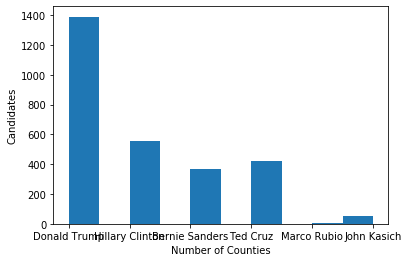

In [193]:
plt.hist(election_county_facts_df['candidate'])
plt.xlabel('Number of Counties')
plt.ylabel('Candidates')

In [194]:
# primary results for 10 counties with most non-white voters
election_county_facts_df.sort_values(by='White_percent', ascending=True).head(10)

,state,county,fips,party,candidate,votes,fraction_votes,area_name,Population,PST040210,...,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,Pop_per_sq,Veteran_percent
2087,South Dakota,Oglala Lakota,46113.0,Democrat,Bernie Sanders,574,0.575,Shannon County,14218.0,13586.0,...,0.0,0.0,0.0,39229.0,2883.0,18096.0,0.0,2093.90,6.5,0.047756
2091,South Dakota,Todd,46121.0,Democrat,Bernie Sanders,524,0.562,Todd County,9882.0,9612.0,...,25.7,0.0,0.0,39515.0,3911.0,1719.0,0.0,1388.56,6.9,0.050293
2742,Wisconsin,Menominee,55078.0,Democrat,Bernie Sanders,355,0.633,Menominee County,4522.0,4232.0,...,22.9,0.0,0.0,5207.0,1142.0,0.0,14.0,357.61,11.8,0.075630
1170,Mississippi,Jefferson,28063.0,Democrat,Hillary Clinton,1550,0.890,Jefferson County,7599.0,7732.0,...,53.1,0.0,0.0,18620.0,2073.0,0.0,0.0,519.93,14.9,0.040005
1149,Mississippi,Claiborne,28021.0,Democrat,Hillary Clinton,1411,0.903,Claiborne County,9080.0,9598.0,...,14.5,0.0,0.0,39271.0,3675.0,4726.0,0.0,487.41,19.7,0.037555
1164,Mississippi,Holmes,28051.0,Democrat,Hillary Clinton,3301,0.929,Holmes County,18459.0,19478.0,...,25.9,207973.0,31091.0,114372.0,5599.0,5530.0,7.0,756.70,25.4,0.031096
43,Alabama,Macon,1087.0,Democrat,Hillary Clinton,4293,0.892,Macon County,19425.0,21450.0,...,0.0,0.0,0.0,87509.0,3932.0,19354.0,1.0,608.89,35.2,0.085560
2596,Virginia,Petersburg,51730.0,Democrat,Hillary Clinton,4099,0.854,Petersburg city,32701.0,32420.0,...,22.6,595891.0,356054.0,324219.0,9823.0,36635.0,8.0,22.93,1413.7,0.082322
2039,South Dakota,Buffalo,46017.0,Democrat,Hillary Clinton,110,0.608,Buffalo County,2077.0,1912.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,471.38,4.1,0.038036
31,Alabama,Greene,1063.0,Democrat,Hillary Clinton,2714,0.901,Greene County,8553.0,9045.0,...,36.1,0.0,0.0,33639.0,3697.0,1226.0,4.0,647.11,14.0,0.058693


Text(0, 0.5, 'Number of Counties')

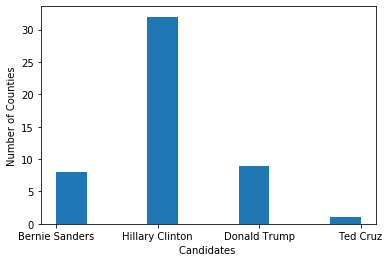

In [195]:
# primary results for 50 highest median income counties
df2 = election_county_facts_df.sort_values(by='below_poverty', ascending=False).head(50)
plt.hist(df2['candidate'])
plt.xlabel('Candidates ')
plt.ylabel('Number of Counties')

## Predicting political party choice of a county using KNN Classifier 

In [228]:
X = election_county_facts_df.drop(['party', 'votes', 'county', 'fips', 'candidate', 'area_name', 'fraction_votes'], axis=1)
Y = election_county_facts_df['party']

#  encode 'party'variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_le = le.fit_transform(Y)

#. convert 'state' feature to dummies
X_clean = pd.get_dummies(X)

#  scaling variables
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_clean)

In [229]:
X.columns

Index(['state', 'Population', 'PST040210', 'PST120214', 'POP010210',
       'AGE135214', 'P_under_18', 'P_over_65', 'F_percent', 'White_percent',
       'Black_percent', 'Native_percent', 'Asian_percent', 'RHI525214',
       'RHI625214', 'Hispanic_percent', 'RHI825214', 'POP715213', 'POP645213',
       'Other_languages', 'EDU635213', 'EDU685213', 'LFE305213', 'HSG010214',
       'HSG445213', 'HSG096213', 'HSG495213', 'HSD410213', 'HSD310213',
       'INC910213', 'Median_house_income', 'below_poverty', 'BZA010213',
       'BZA110213', 'BZA115213', 'NES010213', 'SBO001207', 'SBO315207',
       'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207', 'SBO015207',
       'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207', 'AFN120207',
       'BPS030214', 'LND110210', 'Pop_per_sq', 'Veteran_percent'],
      dtype='object')

Text(0, 0.5, 'Amount of variance explained')

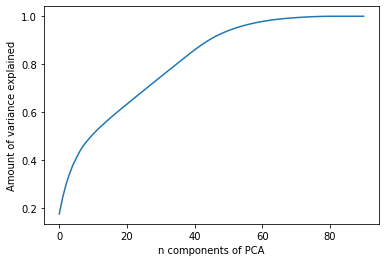

In [230]:
#. using PCA to reduce colinearity between all features and to reduce the dimensionality.
#. as a consequence of this technique, we will not have interpretability of what the most 
#. import demographics were. 
from sklearn.decomposition import PCA
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n components of PCA')
plt.ylabel('Amount of variance explained')

## Seems like choosing 70 components explains more than 95% of variance in the features

In [231]:
#. transforming the dataset with PCA using n_components = 70
pca = PCA(n_components=70)
X_dataset = pca.fit_transform(X_scaled)

In [232]:
#. there is an imbalance of data for our response class
election_county_facts_df.groupby(by='party').count()['county']

party
Democrat       929
Republican    1869
Name: county, dtype: int64

In [233]:
#  train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(X_dataset, Y, random_state=40)

#. Addressing class imbalance by upsampling 'democratic' class data to match the number of 'republican' class data
combined_train = pd.DataFrame(np.concatenate([x_train, Y_train[:,None]], axis=1))

#  split republican and democratic class data
dem = combined_train[combined_train.iloc[:, -1] == 'Democrat']
rep = combined_train[combined_train.iloc[:, -1] == 'Republican']

#. upscale 'democratic' class data
from sklearn.utils import resample
dem_upsampled = resample(dem, n_samples=len(rep), random_state=40)

#. combine upscaled democratic class to republican class
rebalanced_data = pd.concat([dem_upsampled, rep])

#. breaking up rebalanced data into x_train and Y_train again
x_train = rebalanced_data.iloc[:,:-1]
Y_train = rebalanced_data.iloc[:, -1]

In [234]:
rebalanced_data.iloc[:, -1].value_counts()

Republican    1414
Democrat      1414
Name: 70, dtype: int64

Text(0, 0.5, 'Model Score')

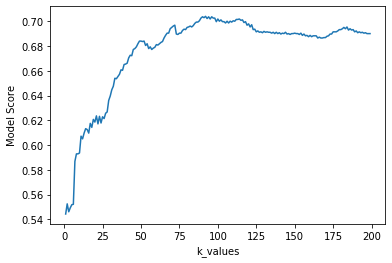

In [235]:
#  knn model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model_fit = knn_model.fit(x_train, Y_train)

#  knn model score
prediction = knn_model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(Y_test, prediction)

#  K-fold cross-validation and optimal k-tuning
from sklearn.model_selection import cross_val_score
k_range = range(1,200)
k_scores_list = []
for k in k_range: 
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_dataset, Y, cv=10, scoring='accuracy')
    k_scores_list.append(scores.mean())

    
#  plot k_range and k_scores_list
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores_list)
plt.xlabel('k_values')
plt.ylabel('Model Score')

## Optimal k-value seems to be around 90. We will use this to build our final KNN classifier model. 

In [236]:
knn_model = KNeighborsClassifier(n_neighbors=90)
scores = cross_val_score(knn_model, X_dataset, Y_le, cv=10, scoring='accuracy')
k_scores_list.append(scores.mean())
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

    Democrat       0.71      0.78      0.74       245
  Republican       0.88      0.83      0.85       455

    accuracy                           0.81       700
   macro avg       0.79      0.81      0.80       700
weighted avg       0.82      0.81      0.81       700



In [237]:
print(confusion_matrix(Y_test, prediction))

[[191  54]
 [ 77 378]]


## The model accuracy proves to be around 81% at predicting political choice of a county based on county demographic data. 